In [51]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy.integrate as integrate
%matplotlib inline

In [64]:
b=2
mu=5
def Densidad(x):
    if x>0:
        return (1/(m.gamma(mu/b)*(b**(mu/b))))*(x**((mu/b)-1))*m.exp(-x/b)
    else:
        return 0

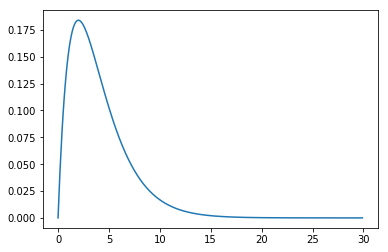

In [92]:
Y = [Densidad(x) for x in np.arange(0,30,0.1)]
X = np.arange(0,30,0.1)
plt.plot(X,Y)

In [28]:
def sim(f,E,n):
    R = []
    Y = [integrate.quad(f,-np.inf,x)[0] for x in E]
    for i in range(n):
        u = np.random.uniform()
        j = 0
        for j in range(len(E)):
            if Y[j]<u:
                next
            else:
                R.append(E[j])
                break
    return R

In [97]:
%%time
Y1 = sim(Densidad,np.arange(0.1,30,0.01),100000)

CPU times: user 21.5 s, sys: 28 ms, total: 21.6 s
Wall time: 21.7 s


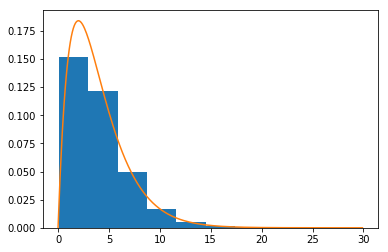

In [98]:
plt.hist(Y1,density=True)
plt.plot(X,Y)

In [80]:
def VarianzaAsintotica(f,p,E,I,n,k):
    L = []
    for i in range(k):
        Y = sim(f,I,n)
        T = E(Y)    
        L.append(m.sqrt(n)*(T-p))
    plt.hist(L)
    V = np.var(L)
    return V

9.193111687599995

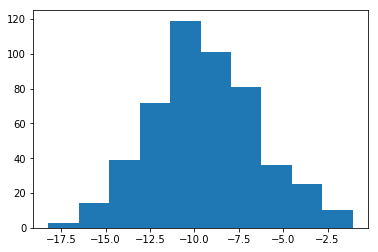

In [99]:
VarianzaAsintotica(Densidad,5,lambda x: np.mean(x),np.arange(-1,50,0.1),100,500)

In [75]:
def ARE(f,E1,E2,I,p,n,k):
    return VarianzaAsintotica(f,p,E1,I,n,k)/VarianzaAsintotica(f,p,E2,I,n,k)

In [79]:
ARE(Densidad,lambda x: np.mean(x),lambda x:np.var(x),np.arange(-1,50,0.1),5,1000,1000)

KeyboardInterrupt: 